## K-Nearest Neighbors (KNN)

**K-Nearest Neighbors (KNN)** merupakan salah satu algoritma *supervised learning* yang paling sederhana. Algoritma ini bekerja mengklasifikasikan data abru berdasarkan kemiripan dengan sejumlah K tetangga terdekatnya. Dengan kata lain, data baru akan diklasifikasikan ke dalam kategori berdasarkan mayoritas kategori tetangganya. 

## Dataset 

Dataset yang digunakan dalam praktek ini adalah dataset **German Credit Risk** yang terdiri dari 1000 baris data dan 9 kolom.

**Attribute Information**
* Age
* Sex
* Job
* Housing
* Saving accounts
* Checking account
* Credit amount
* Duration
* Purpose

Output dari praktek ini nantinya adalah membuat sebuah model untuk memprediksi jenis **Purpose** dari data baru menggunakan algoritma K-Nearest Neighbors (KNN).

Pertama *import library* yang akan digunakan seperi *Pandas, Numpy, Matplotlib,* dan *Seaborn*

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

*Load* dataset ke dalam dataframe Pandas dengan `read_csv().`

In [7]:
# Load dataset ke dataframe Pandas

df = pd.read_csv('german_credit_data.csv')
df.head(10)

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car
5,5,35,male,1,free,NaN,NaN,9055,36,education
6,6,53,male,2,own,quite rich,NaN,2835,24,furniture/equipment
7,7,35,male,3,rent,little,moderate,6948,36,car
8,8,61,male,1,own,rich,NaN,3059,12,radio/TV
9,9,28,male,3,own,little,moderate,5234,30,car


Output yang tampil di atas merupakan data yang akan dipakai. Pada kolom pertama terdapat data `Unnamed: 0` yang artinya tidak merepresentasikan data. Oleh karena itu kolom ini perlu dihapus dengan menggunakan syntax `drop()` dan memberikan parameter `axis = 1` yang menandakan bahwa kita ingin menghapus kolom tersebut.

In [8]:
# Menghapus kolom 'Unnamed: 0'

df.drop('Unnamed: 0', axis = 1, inplace = True)

Lihat dataframe setelah dilakukan penghapusan kolom.

In [9]:
# Menampilkan 5 data teratas di dataframe df

df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,NaN,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,NaN,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car


Selanjutnya mari kita analisis data tersebut.

## Analisis dan Visualisasi Data 

Pertama yang perlu diperhatikan adalah jumlah data untuk masing-masing kategori di kolom target, yaitu kolom `Purpose`, dengan menggunakan `value_counts()`.

In [10]:
# Menampilkan jumlah data pada masing-masing kategori pada kolom 'Purpose'

df['Purpose'].value_counts()

car                    337
radio/TV               280
furniture/equipment    181
business                97
education               59
repairs                 22
vacation/others         12
domestic appliances     12
Name: Purpose, dtype: int64

Kita juga dapat melihat jumlah data untuk masing-masing kategori pada kolom lainnya yang bertipe `object` seperti `Saving accounts, Checking account` dan `Housing`

In [11]:
# Menampilkan jumlah data pada masing-masing kategori pada kolom 'Saving accounts'

df['Saving accounts'].value_counts()

little        603
moderate      103
quite rich     63
rich           48
Name: Saving accounts, dtype: int64

In [12]:
# Menampilkan jumlah data pada masing-masing kategori pada kolom 'Checking account'

df['Checking account'].value_counts()

little      274
moderate    269
rich         63
Name: Checking account, dtype: int64

In [13]:
# Menampilkan jumlah data pada masing-masing kategori pada kolom 'Housing'

df['Housing'].value_counts()

own     713
rent    179
free    108
Name: Housing, dtype: int64

Untuk kolom yang bertipe numerik seperti integer atau float, kita dapat membuat visualisasinya dengan histogram untuk melihat sebaran datanya.

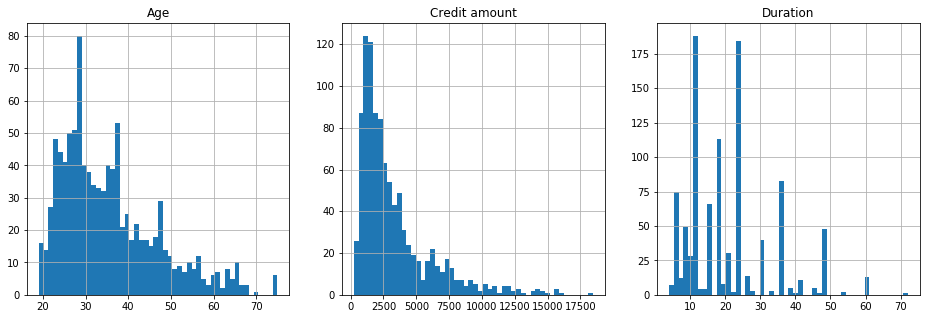

In [14]:
# Menampilkan histogram Age, Credit Amount, dan Duration

fig, ax = plt.subplots(ncols=3, nrows=1, figsize=(16, 5))

# Menambahkan subplot dengan indexing
ax0 = fig.add_subplot(ax[0])
ax1 = fig.add_subplot(ax[1])
ax2 = fig.add_subplot(ax[2])

# Subplot ax[0] : Age
df.hist(column='Age', bins=50, ax=ax0)

# Subplot ax[1] : Credit amount
df.hist(column='Credit amount', bins=50, ax=ax1)

# Subplot ax[2] : Duration
df.hist(column='Duration', bins=50, ax=ax2)

plt.subplots_adjust(wspace=0.2)
plt.show()

Jika ingin memvisualisasikan jumlah data untuk tiap kategori, dapat menggunakan `countplot()` dari Seaborn seperti di bawah ini.

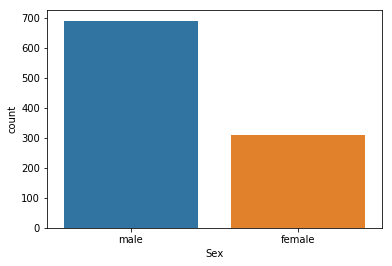

In [15]:
# Menampilkan visualisasi perbandingan jumlah data untuk tiap jenis kelamin pada kolom 'Sex'

sns.countplot(x='Sex', data=df)

Kita juga dapat membaut visualisasi kolom yang berisi nilai kategori berdasarkan kolom kategori lainnya. Misalnya kita kan membuat visualisasi pada kolom `Housing` berdasarkan kolom `Sex`

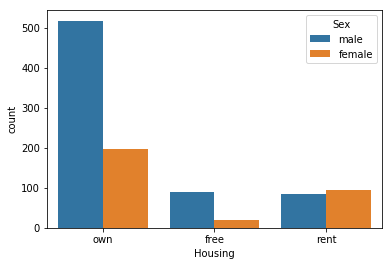

In [16]:
# Menampilkan visualisasi perbandingan jumlah data untuk tiap jenis 'Housing' berdasarkan kolom 'Sex'

sns.countplot(x='Housing', hue='Sex', data=df)

Kita lakukan hal yang sama untuk kolom `Purpose` dengan mengatur ukuran *figure* dengan Matplotlib dan warna *colormap* dengan parameter `palette`

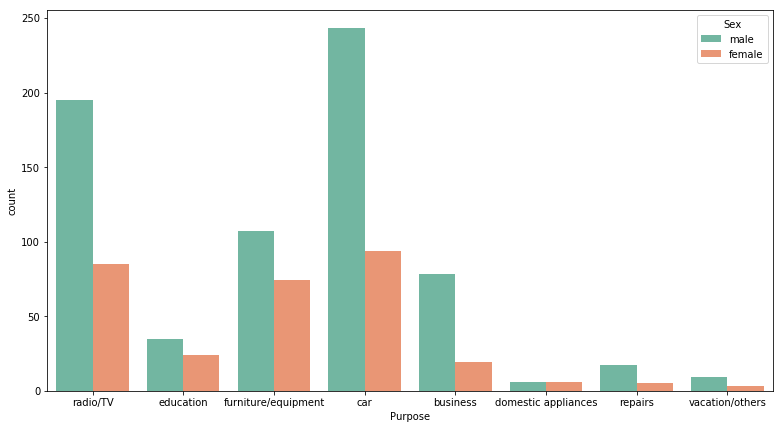

In [17]:
# Menampilkan visualisasi 'Purpose' berdasarkan 'Sex'

plt.figure(figsize=(13, 7))
sns.countplot(x='Purpose', hue='Sex', data=df, palette='Set2')

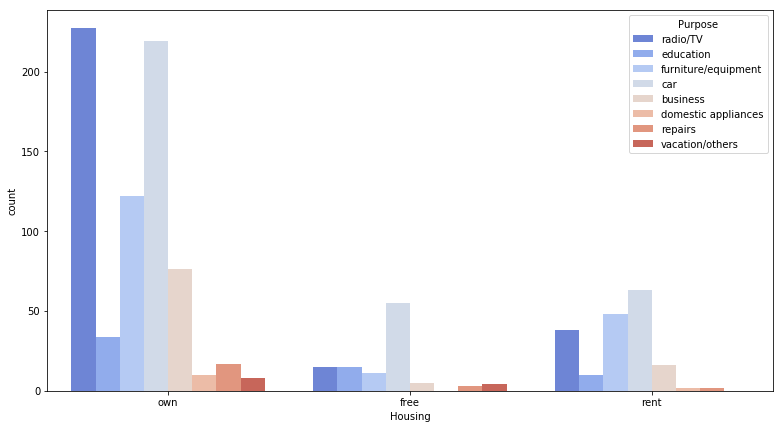

In [18]:
# Menampilkan Visualisasi data 'Housing' berdasarkan 'Purpose'

plt.figure(figsize=(13,7))
sns.countplot(x='Housing', hue='Purpose', data=df, palette='coolwarm')

Dengan Seaborn, kita juga dapat melihat korelasi antar atrribut yang memiliki nilai numerik. Untuk men-*generate* korelasi, kita menggunakan `corr()`, setelah itu tampilkan korelasi tersebut pada `heatmap`.

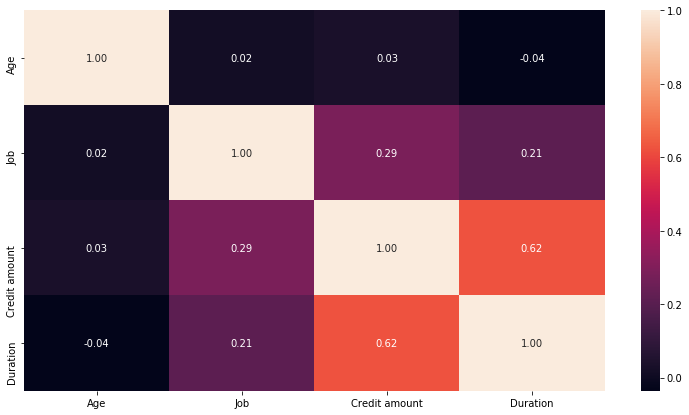

In [19]:
# Menampilkan korelasi antar atribut dengan Heatmap

plt.figure(figsize=(13,7))

corr = df.corr()
sns.heatmap(corr, annot=True, fmt='.2f')

Kita juga dapat menampilkan `pairplot()` dengan Seaborn

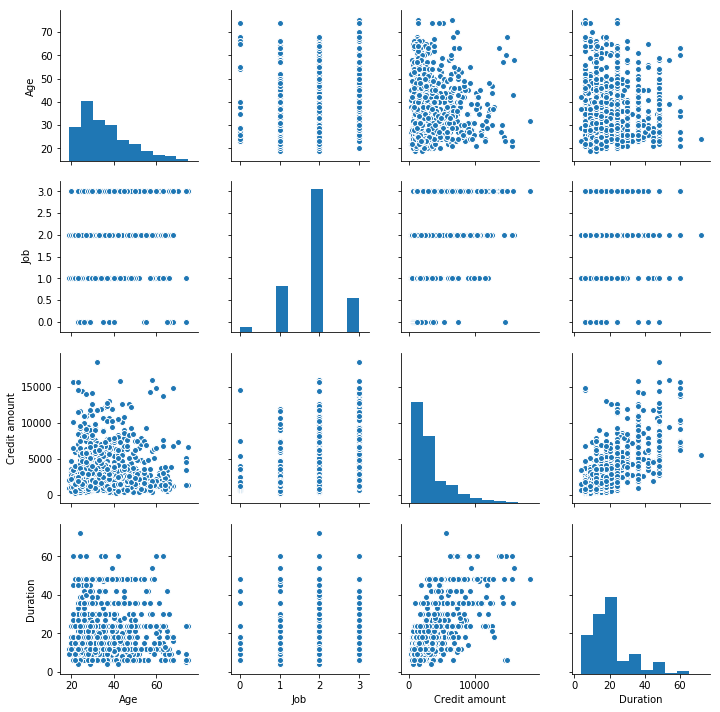

In [20]:
# Menampilkan pairplot

sns.pairplot(df)

## Preprocessing Data 

*Data Preparation* atau *preprocessing* perlu dilakukan sebelum dilakukan pemodelan. Yang pertama sekali dicek adalah info singkat dari dataset yang digunakan, dengan menggunakan `info()`. Darisini kita akan mengetahui apakah ada data yang mengalami *missing value* atau nilai yang *null* pada dataframe dan juga tipe datanya

In [21]:
#Menampilkan info dataframe df

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
Age                 1000 non-null int64
Sex                 1000 non-null object
Job                 1000 non-null int64
Housing             1000 non-null object
Saving accounts     817 non-null object
Checking account    606 non-null object
Credit amount       1000 non-null int64
Duration            1000 non-null int64
Purpose             1000 non-null object
dtypes: int64(4), object(5)
memory usage: 70.4+ KB


Seperti yang kita lihat, dari 1000 baris data ada 2 kolom yang jumlah nilai *non-null* nya tidak sampai 1000, yaitu data pada kolom `Saving accounts` dan `Checking account`. ini artinya adalah data yang mengalami *missing values*. Kita akan mengisi nilai *null* tersebut dengan nilai **little** yang merupakan nilai terbanyak pada 2 kolom tersebut dengan menggunakan *method* `fillna()`

In [22]:
# Menangani Missing Values

df['Saving accounts'].fillna('little', inplace=True)
df['Checking account'].fillna('little', inplace=True)

Execute kembali `info()` untuk melihat perubahan setelah penanganan missing values

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
Age                 1000 non-null int64
Sex                 1000 non-null object
Job                 1000 non-null int64
Housing             1000 non-null object
Saving accounts     1000 non-null object
Checking account    1000 non-null object
Credit amount       1000 non-null int64
Duration            1000 non-null int64
Purpose             1000 non-null object
dtypes: int64(4), object(5)
memory usage: 70.4+ KB


Kemudian kita akan memisahkan kolom fitur dan kolom target. Kolom target adalah kolom `Purpose`, sedangkan sisanya merupakan kolom `fitur`

In [24]:
# Mendefenisikan kolom fitur dan kolom target

df_features = df.drop('Purpose', axis=1)
df_target = df['Purpose']

Lihat hasil dari `df_features` yang sudah dibuat untuk menampung kolom fitur

In [25]:
df_features

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration
0,67,male,2,own,little,little,1169,6
1,22,female,2,own,little,moderate,5951,48
2,49,male,1,own,little,little,2096,12
3,45,male,2,free,little,little,7882,42
4,53,male,2,free,little,little,4870,24
5,35,male,1,free,little,little,9055,36
6,53,male,2,own,quite rich,little,2835,24
7,35,male,3,rent,little,moderate,6948,36
8,61,male,1,own,rich,little,3059,12
9,28,male,3,own,little,moderate,5234,30


## Encoding 

Selanjutnya adalah melakukan *encoding* terhadap data yang memiliki nilai aktegori seperti pada kolom `Sex, Housing, Saving accounts, dan Checking account`. Kita akan menggunakan atribut Pandas `.cat.codes` untuk *encoding* data tersebut.


Seperti yang kita lihat dari hasil `info()`, tipe data untuk kolom-kolom tersebut adalah *object*, sementara `.cat.codes` hanya dapat diaplikasikan pada kolom dengan tipe *category*. karena itu, kita harus mengubah tipe data dari kolom-kolom tersebut dengan method `astype()`.

In [26]:
# Mengubah tipe data menjadi category
df_features[['Sex', 'Housing', 'Saving accounts', 'Checking account']] = df_features[['Sex', 'Housing', 'Saving accounts', 'Checking account']].astype('category')

# Cek hasil perubahan tipe data
df_features[['Sex','Housing', 'Saving accounts', 'Checking account']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
Sex                 1000 non-null category
Housing             1000 non-null category
Saving accounts     1000 non-null category
Checking account    1000 non-null category
dtypes: category(4)
memory usage: 4.5 KB


Setelah tipe datanya diubah menjadi *category*, kita dapat langsung mengaplikasikan `.cat.code` untuk tiap kolom.

In [27]:
# Encoding data dengan .cat.codes

df_features['Sex'] = df_features['Sex'].cat.codes
df_features['Housing'] = df_features['Housing'].cat.codes
df_features['Saving accounts'] = df_features['Saving accounts'].cat.codes
df_features['Checking account'] = df_features['Checking account'].cat.codes

Lihat hasil *Encoding* nya

In [28]:
# Menampilkan 5 data terbawah

df_features.tail()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration
995,31,0,1,1,0,0,1736,12
996,40,1,3,1,0,0,3857,30
997,38,1,2,1,0,0,804,12
998,23,1,2,0,0,0,1845,45
999,27,1,2,1,1,1,4576,45


## Normalisasi 

Meskipun sekarang semua kolom fitur sudah berisi nilai numerik, tetapi selisih nilai antarkolom terlalu jauh, seperti pada kolom `Credit amount` yang memiliki nilai ratusan dan ribuan, sementara kolom lainnya bernilai satuan dan ada yang puluhan. Agar hasil dari modelnya lebih maksimal, maka dilakukanlah normalisasi terlebih dahulu pada dataframe nya sehingga nilai antarkolomnya tidak berbeda jauh. Normalisasi dilakukan dengan menggunakan `StandarScaler()` dari Scikit-learn.

In [29]:
# Normalisasi Data

from sklearn.preprocessing import StandardScaler

X = StandardScaler().fit(df_features).transform(df_features.astype(float))
X[0:5]

array([[ 2.76645648,  0.67028006,  0.14694918, -0.13371046, -0.4634091 ,
        -0.65383104, -0.74513141, -1.23647786],
       [-1.19140394, -1.49191369,  0.14694918, -0.13371046, -0.4634091 ,
         1.00143742,  0.94981679,  2.24819436],
       [ 1.18331231,  0.67028006, -1.38377145, -0.13371046, -0.4634091 ,
        -0.65383104, -0.41656241, -0.73866754],
       [ 0.8315025 ,  0.67028006,  0.14694918, -2.01695631, -0.4634091 ,
        -0.65383104,  1.63424694,  1.75038404],
       [ 1.53512213,  0.67028006,  0.14694918, -2.01695631, -0.4634091 ,
        -0.65383104,  0.5666635 ,  0.25695309]])

Data fitur sudah siap digunakan dan disimpan dalam variabel `X`. Sekarang definisikan data targetnya dan masukkan dalam variabel `y`.

In [30]:
# Mendefenisikan data target

y = df_target
y[0:5]

0               radio/TV
1               radio/TV
2              education
3    furniture/equipment
4                    car
Name: Purpose, dtype: object

## Train Test Split 

Tahap selanjutnya adalah membagi data menjadi *training data* dan *testing data*. Pembagian datanya akan menggunakan `train_test_split()` dari Scikit-Learn.

**Train test Split** membagi data tersebut menjadi *training data* yang digunakan untuk melatih model *machine learning* dan *testing data* digunakan untuk mengevaluasi kinerja *machine learning* tersebut.

Kita akan memberikan proporsi untuk data testing sebesar **20%** yang didefenisikan pada parameter `test_size = 0.2`.

In [32]:
# Train test split untuk membagi data training dan testing

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

print('Train set:', X_train.shape, y_train.shape)
print('Test set:', X_test.shape, y_test.shape)

Train set: (800, 8) (800,)
Test set: (200, 8) (200,)


## Modeling 

## Klasifikasi dengan K-nearest Neighbors (KNN)

*Import* terlebih dahulu library yang akan digunakan

In [33]:
from sklearn.neighbors import KNeighborsClassifier

Disini kita menentukan jumlah tetangganya adalah **5**. Maka algoritma KNN akan mencari jumlah mayoritas kategori target dari 5 tetangga terdekat masing-masing data baru untuk kemudian mengklasifikasikan data baru tersebut ke dalam kategori yang mayoritas.

In [34]:
k = 5

# Train Model
model_knn = KNeighborsClassifier(n_neighbors = k).fit(X_train, y_train)
model_knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

## Prediksi 

Setelah dilakukan *training* terhadap data latih `X_train` dan `y_train`, selanjutnya kita dapat melakukan pengujian menggunakan data testing `X_test` dengan method `predict()`.

In [35]:
# Menguji model dengan data testing

y_pred = model_knn.predict(X_test)
y_pred[0:5]

array(['furniture/equipment', 'radio/TV', 'radio/TV', 'radio/TV',
       'radio/TV'], dtype=object)

Kita telah mendapatkan hasil pengujian model yang disimpan pada variabel `y_pred`.

Sebagai perbandingan, tampilkan nilai target sesungguhnya, yaitu `y_test`.

In [36]:
# Menampilkan data testing

y_test[0:5]

841         car
956    radio/TV
544         car
173    radio/TV
759         car
Name: Purpose, dtype: object

## Evaluasi

Untuk mengevaluasi kinerja model *machine learning*, kita dapat menggunakan `accuracy_score()`.

In [38]:
# Mengukur kinerja model machine learning

from sklearn.metrics import accuracy_score

print('Akurasi Train set:', accuracy_score(y_train, model_knn.predict(X_train)))
print('Akurasi Test set:', accuracy_score(y_test, y_pred))

Akurasi Train set: 0.535
Akurasi Test set: 0.375


## Mencari Nilai k Terbaik 

Nilai k di atas adalah nilai yang kita tentukan sendiri. Perbedaan nilai `K` atau jumlah tetangga sangat menentukan akurasi model. Oleh karena itu, sebaiknya kita membuat model dengan mencari nilai ` K` yang dapat menghasilkan akurasi terbaik. Misalnya disini kita akan mencari nilai `K` terbaik dari 1 sampai 14.

In [39]:
# Mencari nilai K dengan akurasi terbaik

Ks = 15 
mean_acc = np.zeros((Ks-1))

for n in range(1, Ks):
    
    # Train Model and Predict
    model_knn = KNeighborsClassifier(n_neighbors = n).fit(X_train, y_train)
    y_pred = model_knn.predict(X_test)
    
    mean_acc[n-1] = accuracy_score(y_test, y_pred)
    
mean_acc

array([0.275, 0.285, 0.34 , 0.38 , 0.375, 0.405, 0.42 , 0.405, 0.425,
       0.43 , 0.435, 0.435, 0.45 , 0.43 ])

Kita dapat memvisualisasikan hasil tersebut dengan *line plot*.

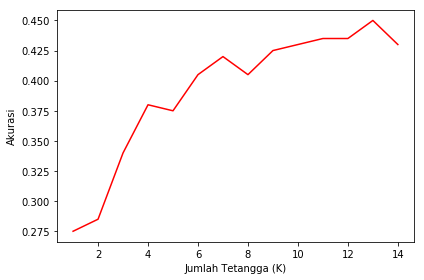

In [40]:
# Visualisasi hasil K

plt.plot(range(1, Ks), mean_acc, 'r')
plt.ylabel('Akurasi')
plt.xlabel('Jumlah Tetangga (K)')
plt.tight_layout()
plt.show()

In [41]:
# Print akurasi terbaik

print('Akurasi terbaik adalah ', mean_acc.max(), 'dengan nilai k =', mean_acc.argmax()+1)

Akurasi terbaik adalah  0.45 dengan nilai k = 13


Dapat kita lihat bahwa untuk dataset ini dengan menggunakan algoritma KNN, nilai K yang menghasilkan akurasi terbaik untuk data testing adalah K = 13 dengan akurasi 0.45.